In [53]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
from scipy.stats import levene
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_colwidth', 1000)

In [26]:
rng = 13275625

In [27]:
df = pd.read_csv('spotify52kData.csv')
star_ratings = pd.read_csv('starRatings.csv', header=None)
df

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


In [28]:
star_ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

In [29]:
df['duration'].isna().sum()

0

In [30]:
df['popularity'].isna().sum()

0

<Axes: >

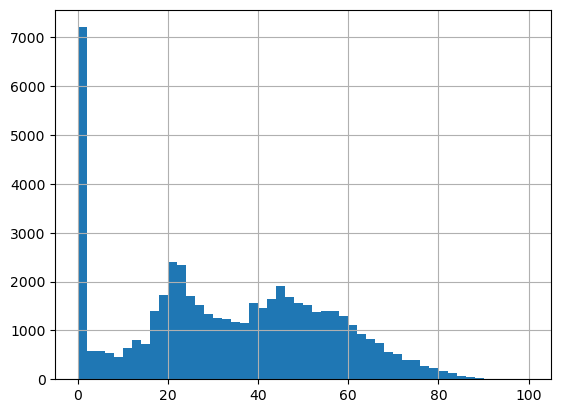

In [31]:
df['popularity'].hist(bins=50)

<Axes: >

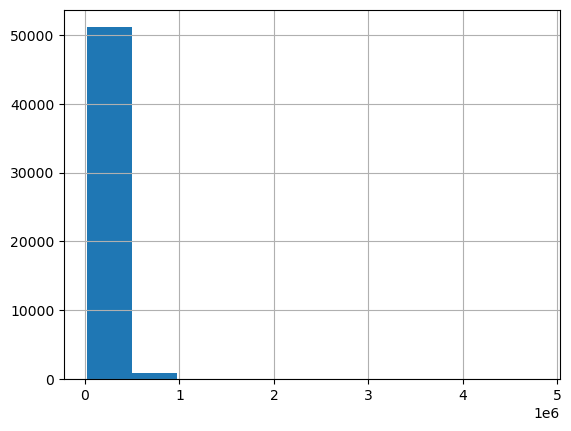

In [32]:
df['duration'].hist()

In [33]:
median_duration = df['duration'].median()

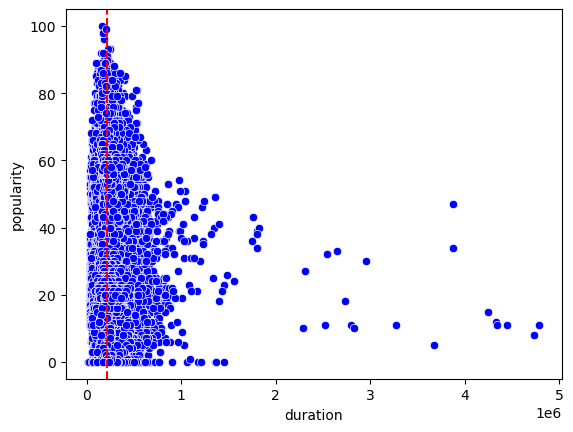

In [34]:
sns.scatterplot(data=df, x='duration', y='popularity', color='blue')
plt.axvline(x=median_duration, color='red', linestyle='--')

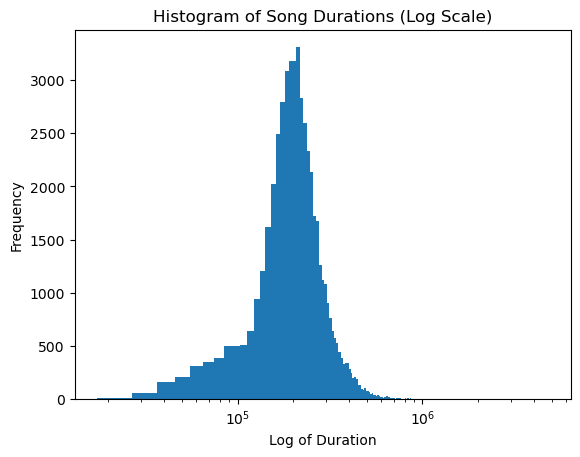

In [35]:
# So we will make a log transform
# We'll exclude zero or negative durations to avoid log transform issues (quick data check)
filtered_durations = df[df['duration'] > 0]['duration']

# Plot the histogram of the filtered durations
plt.hist(filtered_durations, bins=500)  # You can adjust the number of bins as needed
plt.xscale('log')
plt.title('Histogram of Song Durations (Log Scale)')
plt.xlabel('Log of Duration')
plt.ylabel('Frequency')
plt.show()

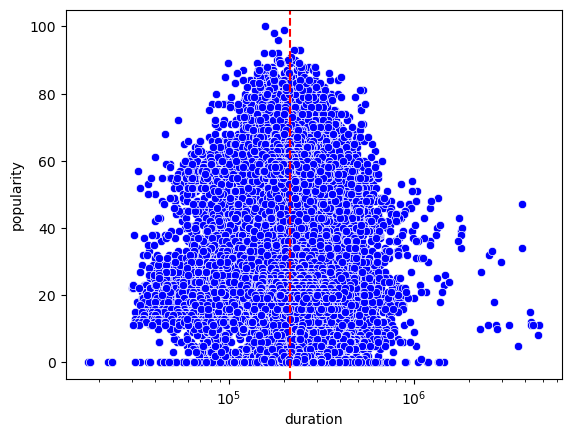

In [36]:
#Plotting popularity vs log duration

scatter_plot = sns.scatterplot(data=df, x='duration', y='popularity', color='blue')

# Get the current axis and set the x-scale to log
plt.gca().set_xscale('log')

# Add a vertical line for the median duration, if you wish to keep it
median_duration = df['duration'].median()
plt.axvline(x=median_duration, color='red', linestyle='--')

# Show the plot with the log-transformed x-axis
plt.show()

Coefficients of the best-fit line:
Slope: -1.0315146616296003
Intercept: 45.76636995249906
R-squared: 0.0003748921308567299


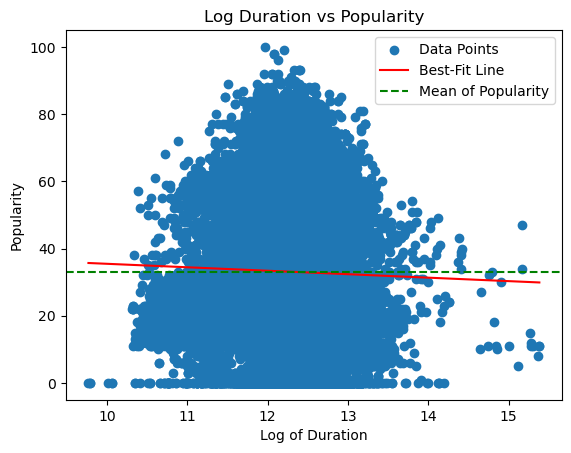

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'duration' and 'popularity'
temp = df
x = temp['duration']
y = temp['popularity']

# Fit a linear regression model to the log of x and y
coefficients = np.polyfit(np.log(x), y, 1)  # Using log(x) instead of x
# Print the coefficients
print("Coefficients of the best-fit line:")
print("Slope:", coefficients[0])
print("Intercept:", coefficients[1])

# Create a polynomial function using the coefficients
poly_function = np.poly1d(coefficients)

# Generate y values for the best-fit line using the log of x for the line
x_line = np.linspace(min(np.log(x)), max(np.log(x)), len(y))  # Create a range of x values
y_fit = poly_function(x_line)

# Calculate residuals, SS_residual, and SS_total for R-squared
residuals = y - poly_function(np.log(x))
ss_residual = np.sum(residuals ** 2)
ss_total = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Print R-squared
print("R-squared:", r_squared)

# Plot the original data points
plt.scatter(np.log(x), y, label='Data Points')  # Use log(x) for the scatter plot

# Plot the best-fit line
plt.plot(x_line, y_fit, color='red', label='Best-Fit Line')

# Add a horizontal line for the mean of y
plt.axhline(y=np.mean(y), color='green', linestyle='--', label='Mean of Popularity')

# Add labels, title and legend
plt.xlabel('Log of Duration')
plt.ylabel('Popularity')
plt.title('Log Duration vs Popularity')
plt.legend()

# Display the plot
plt.show()


In [38]:
# Assuming 'x' and 'y' are defined as in your previous code snippet
x_log = np.log(x)
y = y

# Fit the linear regression model to the log of x and y
coefficients = np.polyfit(x_log, y, 1)
slope = coefficients[0]

# Create a polynomial function using the coefficients
poly_function = np.poly1d(coefficients)

# Calculate the predicted y values
y_pred = poly_function(x_log)

# Calculate residuals
residuals = y - y_pred

# Calculate the standard error of the slope coefficient
n = len(x_log)
x_log_mean = np.mean(x_log)
sse = np.sum(residuals**2)
std_error = np.sqrt(sse / (n - 2)) / np.sqrt(np.sum((x_log - x_log_mean)**2))

# Calculate the t-statistic for the slope
t_statistic = slope / std_error

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n-2))

# Print the t-statistic and p-value
print(f"Slope: {slope}")
print(f"Standard Error: {std_error}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Determine whether to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: there is a statistically significant relationship between x and y.")
else:
    print("Fail to reject the null hypothesis: there is no statistically significant relationship between x and y.")


Slope: -1.0315146616296003
Standard Error: 0.23358637187126607
T-Statistic: -4.4159881989951355
P-Value: 1.0075208080273512e-05
Reject the null hypothesis: there is a statistically significant relationship between x and y.


# Q2

In [39]:
from scipy.stats import mannwhitneyu



In [40]:
df['explicit'].isna().sum()

0

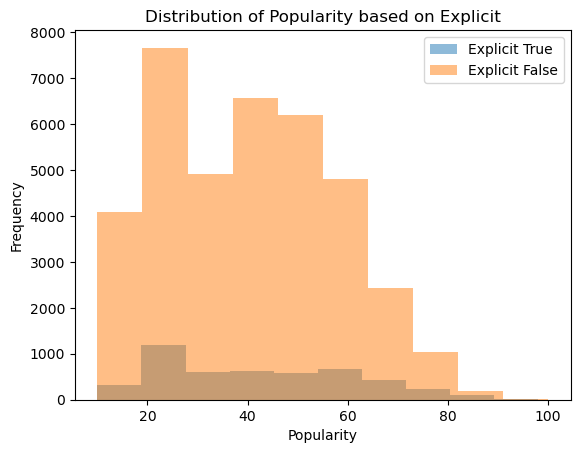

In [41]:
explicit_true = df[df['explicit'] == True]['popularity']
explicit_false = df[df['explicit'] == False]['popularity']
explicit_true = explicit_true[explicit_true>=10]
explicit_false = explicit_false[explicit_false>=10]

# Plot the distributions
plt.hist(explicit_true, bins=10, alpha=0.5, label='Explicit True')
plt.hist(explicit_false, bins=10, alpha=0.5, label='Explicit False')

# Add labels and title
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity based on Explicit')

# Add legend
plt.legend()

# Show the plot
plt.show()

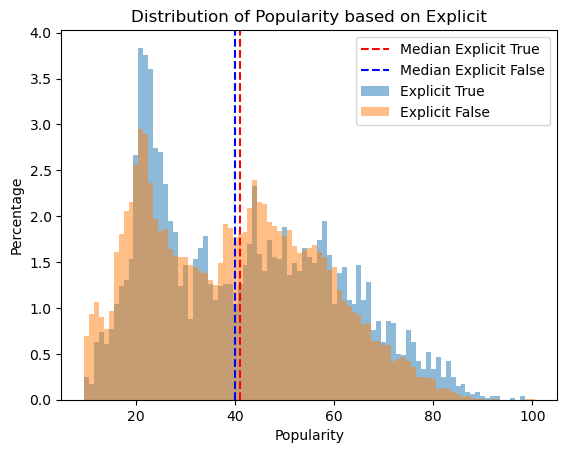

In [42]:
median_explicit_true = explicit_true.median()
median_explicit_false = explicit_false.median()

percentage_explicit_true = explicit_true.value_counts(normalize=True) * 100
percentage_explicit_false = explicit_false.value_counts(normalize=True) * 100

# Plot the distributions
plt.bar(percentage_explicit_true.index, percentage_explicit_true, alpha=0.5, label='Explicit True', width=1.0)
plt.bar(percentage_explicit_false.index, percentage_explicit_false, alpha=0.5, label='Explicit False', width=1.0)
plt.axvline(x=median_explicit_true, color='r', linestyle='--', label='Median Explicit True')
plt.axvline(x=median_explicit_false, color='b', linestyle='--', label='Median Explicit False')

# plt.xlim(0, 10)
# plt.ylim(0,4)
# Add labels and title
plt.xlabel('Popularity')
plt.ylabel('Percentage')
plt.title('Distribution of Popularity based on Explicit')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [43]:
# our data is not normally distributed
#h0: 
statistic, p_value = mannwhitneyu(explicit_true, explicit_false, alternative='greater')

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Statistic: 95430994.0
p-value: 8.303816281161671e-11


In [44]:
from numpy import std, mean
from math import sqrt

nx = len(explicit_true)
ny = len(explicit_false)

# Calculate the variance of the samples
sx = std(explicit_true, ddof=1)  # sample standard deviation for x
sy = std(explicit_false, ddof=1)  # sample standard deviation for y

# Pooled standard deviation
s = sqrt(((nx - 1) * sx ** 2 + (ny - 1) * sy ** 2) / (nx + ny - 2))

# Calculate the means
mx = mean(explicit_true)
my = mean(explicit_false)

# Calculate Cohen's d
d = (mx - my) / s
print("Cohen's d:", d)

Cohen's d: 0.11611342867972935


# Q3

In [45]:
df['mode'].isna().sum()

0

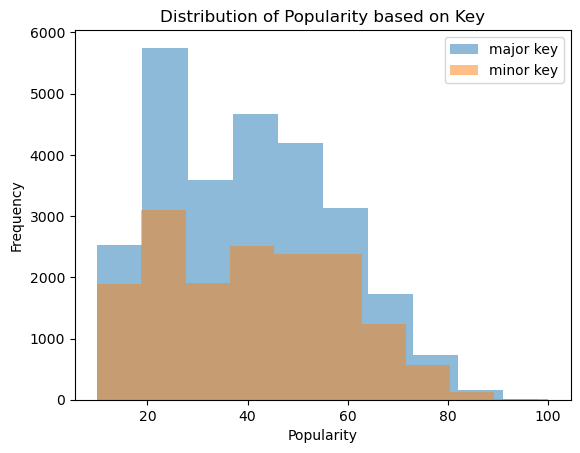

In [46]:
major = df[df['mode'] == True]['popularity']
minor = df[df['mode'] == False]['popularity']

major = major[major >= 10]
minor = minor[minor >= 10]

# Plot the distributions
plt.hist(major, bins=10, alpha=0.5, label='major key')
plt.hist(minor, bins=10, alpha=0.5, label='minor key')

# Add labels and title
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity based on Key')

# Add legend
plt.legend()

# Show the plot
plt.show()

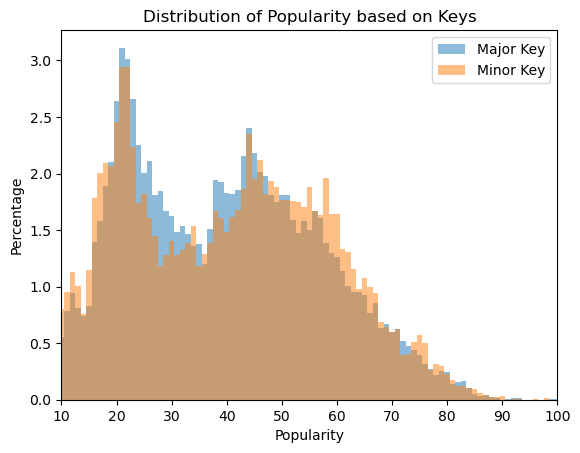

In [47]:
percentage_major = major.value_counts(normalize=True) * 100
percentage_minor = minor.value_counts(normalize=True) * 100

# percentage_major = percentage_major[percentage_major >= 10]
# percentage_minor = percentage_minor[percentage_minor >= 10]

# plt.figure(figsize=(16, 12))
# Plot the distributions
plt.bar(percentage_major.index, percentage_major, alpha=0.5, label='Major Key', width=1.0)
plt.bar(percentage_minor.index, percentage_minor, alpha=0.5, label='Minor Key', width=1.0)

plt.xlim(10, 100)

# Add labels and title
plt.xlabel('Popularity')
plt.ylabel('Percentage')
plt.title('Distribution of Popularity based on Keys')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [48]:
# our data is not normally distributed
#h0: 
statistic, p_value = mannwhitneyu(major, minor, alternative='greater')

# Print the results
print("Mann-Whitney U Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Statistic: 208177236.0
p-value: 0.9999972056776938


# Q4

In [49]:
nan_counts = df.isna().sum()

# Print the NaN counts for each feature
print("NaN counts for each feature:")
print(nan_counts)

NaN counts for each feature:
songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


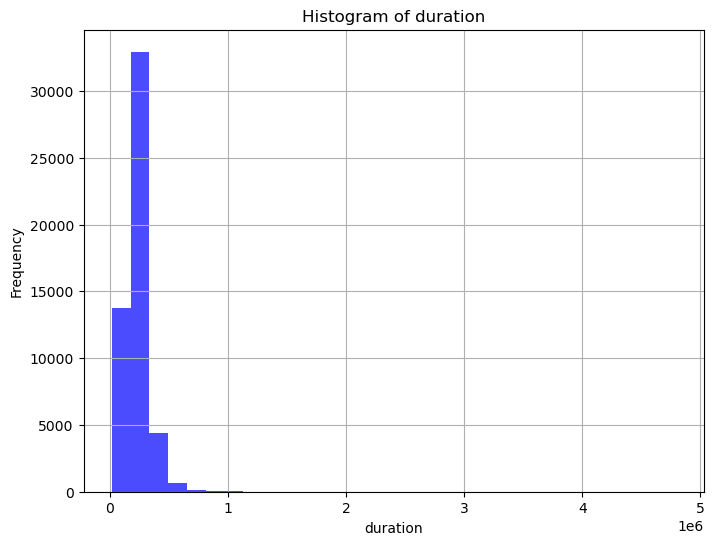

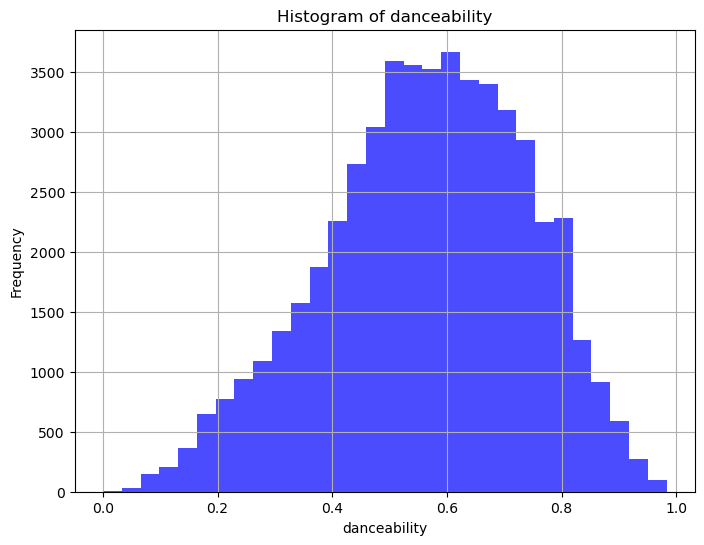

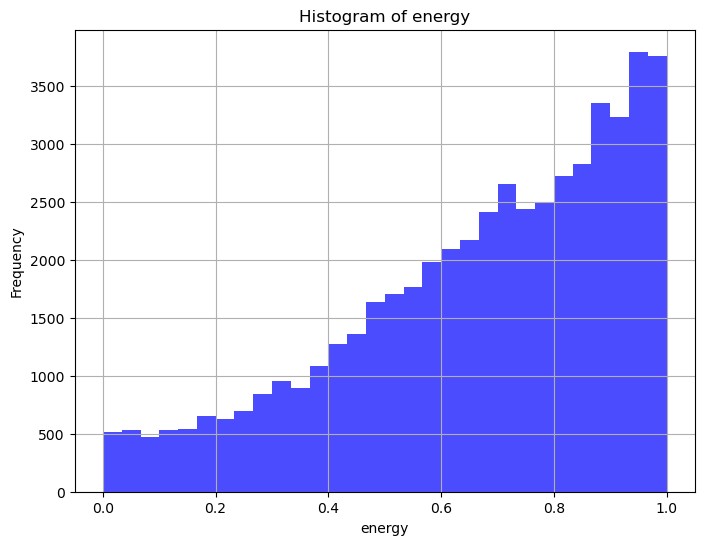

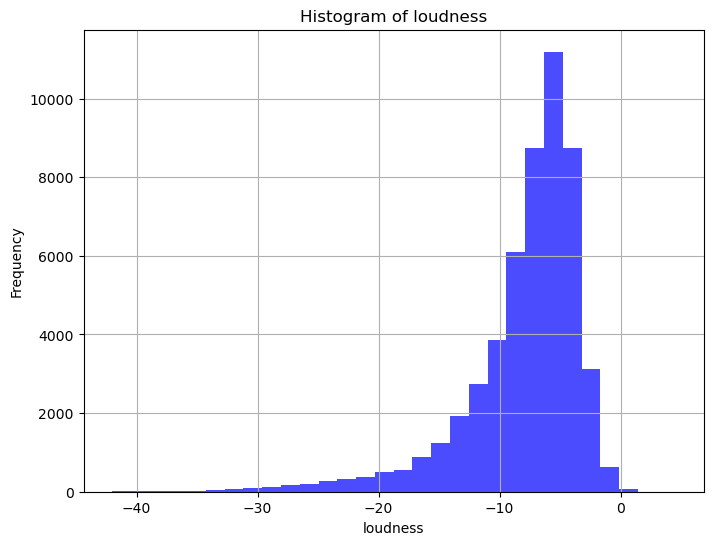

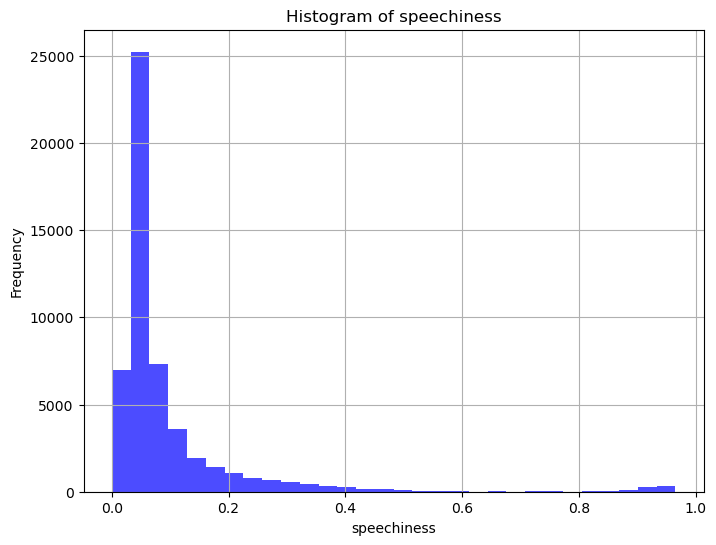

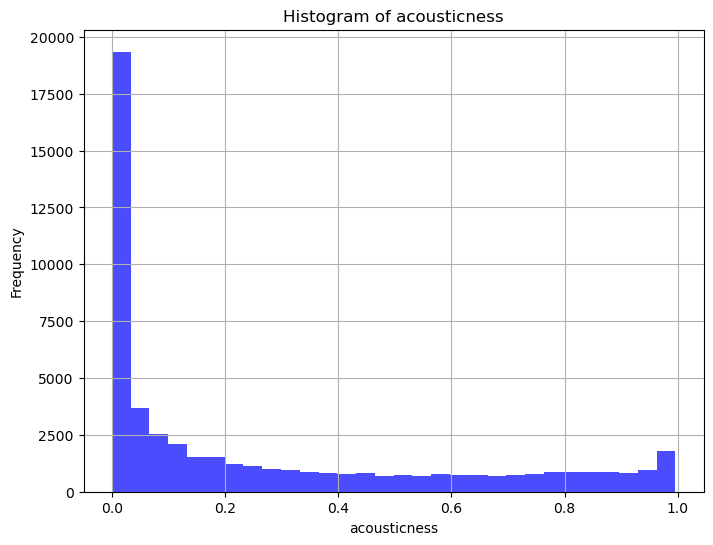

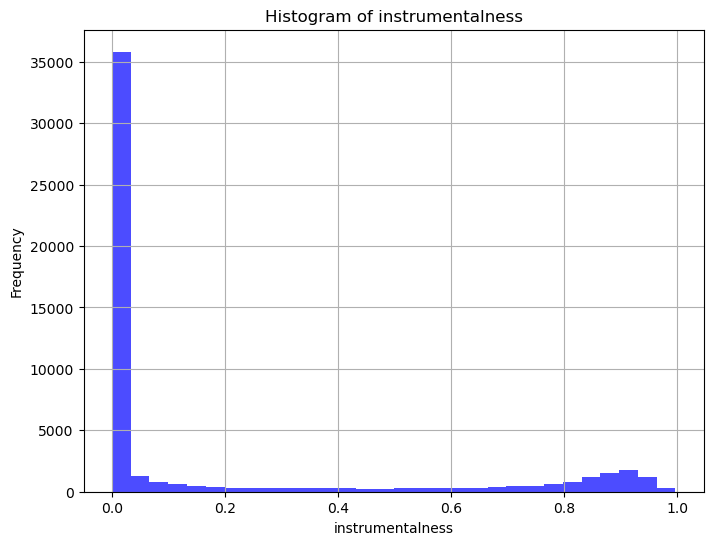

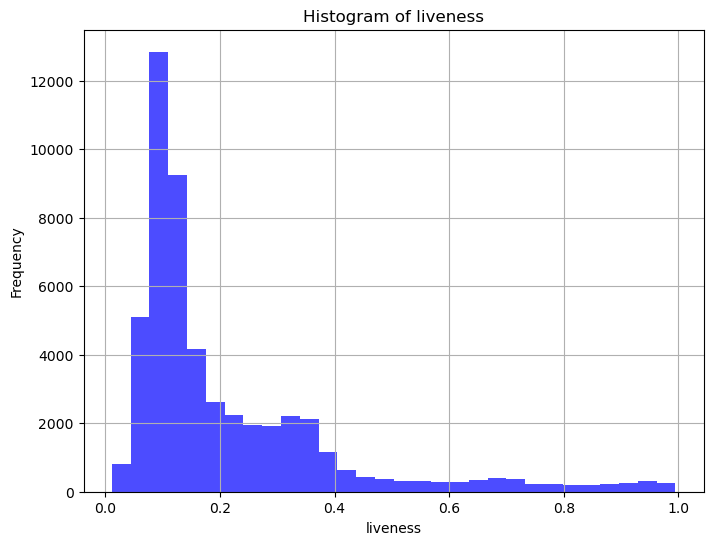

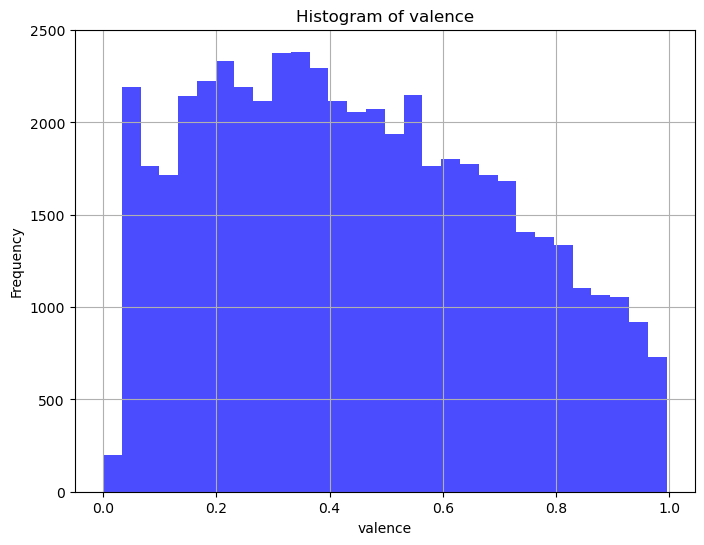

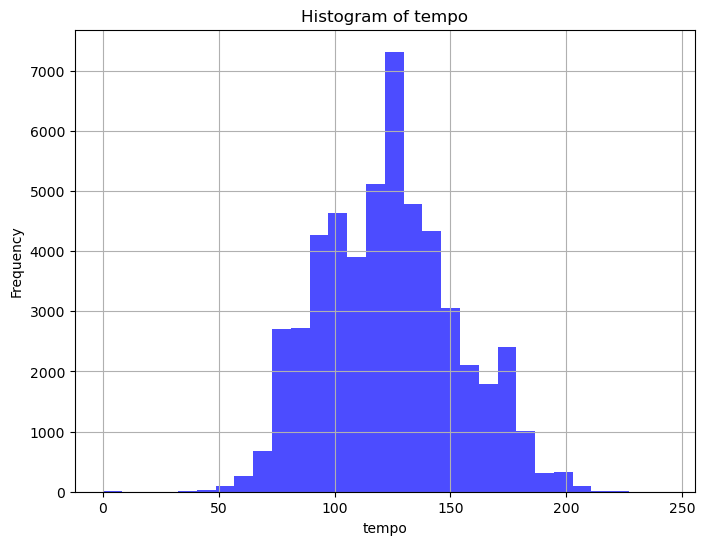

In [50]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Plot histograms for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

(array([ 6374.,   833.,   356.,   791.,  1009.,  1767.,  9148., 10040.,
        16855.,  4827.]),
 array([0.        , 0.46151205, 0.9230241 , 1.38453616, 1.84604821,
        2.30756026, 2.76907231, 3.23058436, 3.69209641, 4.15360847,
        4.61512052]),
 <BarContainer object of 10 artists>)

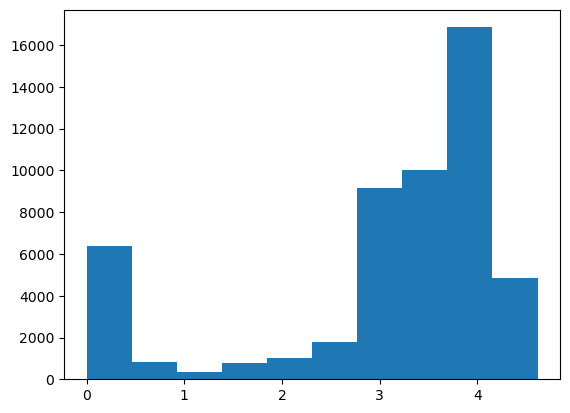

In [51]:
# 3 variables: duration, loudness, tempo
log_pop = np.log(df['popularity']+1)
plt.hist(log_pop)

(array([9363., 5302., 9297., 6356., 8263., 6999., 4165., 1812.,  423.,
          20.]),
 array([-1.5230272 , -1.06311938, -0.60321156, -0.14330374,  0.31660408,
         0.7765119 ,  1.23641972,  1.69632754,  2.15623536,  2.61614318,
         3.076051  ]),
 <BarContainer object of 10 artists>)

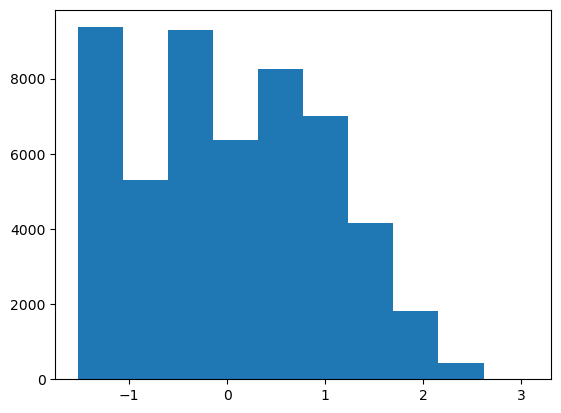

In [54]:
df_subset = df.copy()
scaler_target = StandardScaler()
df_subset['popularity'] = scaler_target.fit_transform(df_subset[['popularity']])
plt.hist(df_subset['popularity'])

In [55]:
df_subset['popularity'].value_counts()

popularity
-1.523027    6374
-0.557221    1300
-0.511230    1274
-0.603212    1095
-0.465239    1066
             ... 
 2.984069       2
 2.892088       1
 3.076051       1
 2.662134       1
 3.030060       1
Name: count, Length: 98, dtype: int64

In [112]:
df_subset = df.copy()
df_subset['duration_log'] = np.log1p(df_subset['duration'])
df_subset.drop(['duration'], axis=1, inplace=True)

features = ['duration_log', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Feature', 'R-squared', 'MSE', 'Beta'])

# Iterate over each feature
for feature in features:
    # Subset the DataFrame
    df_sub = df_subset[[feature, target]].dropna()

    # Prepare data for modeling
    X = df_sub[[feature]]
    y = df_sub[target]

    # Standardize the data
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)

    # Build the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    predictions = model.predict(X)

    # Evaluate the model
    r_squared = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    beta = model.coef_[0]

    # Record results in the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Feature': [feature], 'R-squared': [r_squared], 'MSE': [mse], 'Beta': [beta]})], ignore_index=True)
    
# Sort the results by the absolute value of Beta in descending order
results_df['Absolute_Beta'] = results_df['Beta'].abs()
results_df = results_df.sort_values(by='Absolute_Beta', ascending=False).drop('Absolute_Beta', axis=1)

# Print the results
results_df

,Feature,R-squared,MSE,Beta
6,instrumentalness,0.021017,462.842872,-9.690988
4,speechiness,0.002355,471.665660,-8.024895
7,liveness,0.001922,471.870348,-5.071530
2,energy,0.003128,471.300603,-4.872127
1,danceability,0.001381,472.126486,4.575724
8,valence,0.001279,472.174377,-3.046232
5,acousticness,0.000688,472.453892,1.769692
0,duration_log,0.000375,472.602007,-1.031538
3,loudness,0.003625,471.065312,0.266142
9,tempo,0.000007,472.775979,-0.001957


In [113]:
df_subset = df.copy()
df_subset['duration_log'] = np.log1p(df_subset['duration'])
df_subset.drop(['duration'], axis=1, inplace=True)
df_subset['popularity']=np.log(df_subset['popularity']+1)

features = ['duration_log', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Feature', 'R-squared', 'MSE', 'Beta'])

# Iterate over each feature
for feature in features:
    # Subset the DataFrame
    df_sub = df_subset[[feature, target]].dropna()

    # Prepare data for modeling
    X = df_sub[[feature]]
    y = df_sub[target]

    # Standardize the data
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)

    # Build the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    predictions = model.predict(X)

    # Evaluate the model
    r_squared = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    beta = model.coef_[0]

    # Record results in the DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Feature': [feature], 'R-squared': [r_squared], 'MSE': [mse], 'Beta': [beta]})], ignore_index=True)
    
# Sort the results by the absolute value of Beta in descending order
results_df['Absolute_Beta'] = results_df['Beta'].abs()
results_df = results_df.sort_values(by='Absolute_Beta', ascending=False).drop('Absolute_Beta', axis=1)

# Print the results
results_df

,Feature,R-squared,MSE,Beta
8,valence,0.004921,1.737300,-0.363061
4,speechiness,0.000770,1.744548,0.278740
1,danceability,0.000837,1.744431,-0.216482
7,liveness,0.000763,1.744560,0.194140
6,instrumentalness,0.001326,1.743576,-0.147936
5,acousticness,0.000283,1.745398,0.068914
2,energy,0.000017,1.745863,0.021620
3,loudness,0.001785,1.742774,0.011350
0,duration_log,0.000003,1.745886,0.005869
9,tempo,0.001491,1.743289,0.001745


# Q5

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Select features
df_subset = df.copy()
df_subset['duration_log'] = np.log1p(df_subset['duration'])
df_subset.drop(['duration'], axis=1, inplace=True)


features = ['duration_log', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

df_subset = df_subset[features + [target]].dropna()

# 2. Normalize loudness and tempo between 0 and 1
scaler_minmax = MinMaxScaler()
df_subset[['duration_log','loudness', 'tempo']] = scaler_minmax.fit_transform(df_subset[['duration_log','loudness', 'tempo']])

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_subset.drop([target], axis=1), df_subset[target], test_size=0.2, random_state=rng)

# 4. Standard scaler
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# 5. Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 6. Prediction and evaluation
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# Feature importances
feature_importances = pd.Series(model.coef_, index=features)
feature_importances.sort_values(ascending=False, inplace=True)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print("\nFeature Importances:")
print(feature_importances)

Mean Squared Error (MSE): 451.67932145404507
R-squared (R2): 0.04417463512348829

Feature Importances:
loudness            3.349771
danceability        0.858827
acousticness        0.286014
tempo               0.181139
liveness           -0.492304
duration_log       -0.562238
speechiness        -0.948189
valence            -2.092562
instrumentalness   -2.938669
energy             -3.451793
dtype: float64


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Select features
df_subset = df.copy()
df_subset['duration_log'] = np.log1p(df_subset['duration'])
df_subset.drop(['duration'], axis=1, inplace=True)

features = ['duration_log', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'popularity'

df_subset = df_subset[features + [target]].dropna()

# 2. Normalize loudness and tempo between 0 and 1
scaler_minmax = MinMaxScaler()
df_subset[['duration_log', 'loudness', 'tempo']] = scaler_minmax.fit_transform(df_subset[['duration_log', 'loudness', 'tempo']])

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_subset.drop([target], axis=1), df_subset[target], test_size=0.2, random_state=rng)

# 4. Standard scaler
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# 5. Model training with Lasso regularization and GridSearchCV
param_grid = {'alpha': [0.001,0.01, 0.1, 0.5, 1.0, 10.0]}  # Adjust the values as needed

lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameter value
best_alpha = grid_search.best_params_['alpha']

# Re-train the model with the best hyperparameter
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train)

# 6. Prediction and evaluation
predictions = lasso_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Feature importances (coefficients)
feature_importances = pd.Series(lasso_model.coef_, index=features)
feature_importances.sort_values(ascending=False, inplace=True)

# Print the results
print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print("\nFeature Importances:")
print(feature_importances)

Best Alpha: 0.001
Mean Squared Error (MSE): 451.6797362942618
R-squared (R2): 0.04417375725553496

Feature Importances:
loudness            3.345963
danceability        0.857014
acousticness        0.284154
tempo               0.179714
liveness           -0.491930
duration_log       -0.561077
speechiness        -0.947162
valence            -2.090218
instrumentalness   -2.938292
energy             -3.449481
dtype: float64


# Q6

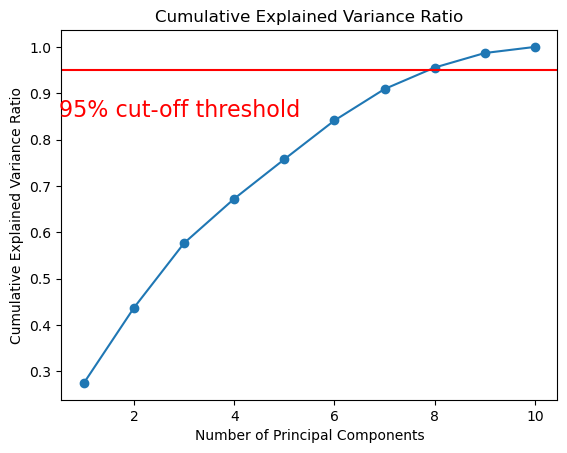

Number of Meaningful Principal Components: 8


In [60]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Select features
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target_genre = 'track_genre'  # Assuming the column name for genre labels

df_subset = df[features + [target_genre]].dropna()
df_subset['duration_log'] = np.log1p(df_subset['duration'])
df_subset.drop(['duration'], axis=1, inplace=True)

features = ['duration_log', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler_minmax = MinMaxScaler()
df_subset[['duration_log', 'loudness', 'tempo']] = scaler_minmax.fit_transform(df_subset[['duration_log', 'loudness', 'tempo']])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(df_subset[features])

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(features_standardized)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)


plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

plt.show()

# Determine the number of meaningful principal components
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of Meaningful Principal Components: {num_components}')

# Use the identified number of components to perform PCA again
pca_final = PCA(n_components=num_components)
principal_components_final = pca_final.fit_transform(features_standardized)



In [61]:
len(df['track_genre'].unique())

52

/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index: 0.055378056261399376


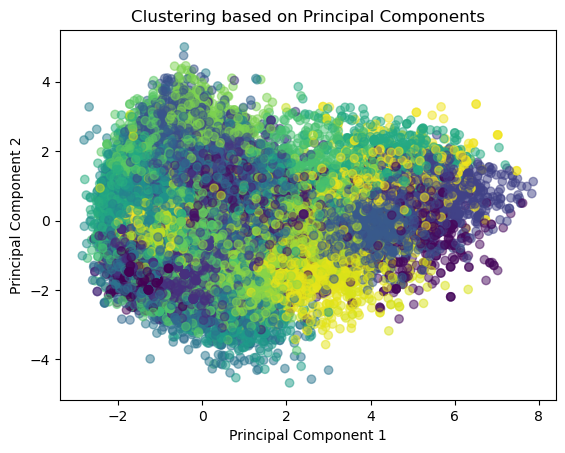

In [62]:
# Perform clustering using KMeans
num_clusters = 52  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=rng)
cluster_labels = kmeans.fit_predict(principal_components_final)

# Evaluate clustering performance (if ground truth labels are available)
if target_genre in df_subset.columns:
    true_labels = df_subset[target_genre].astype('category').cat.codes
    adjusted_rand_index = adjusted_rand_score(true_labels, cluster_labels)
    print(f'Adjusted Rand Index: {adjusted_rand_index}')

# Visualize clusters (2D plot for the first two principal components)
plt.scatter(principal_components_final[:, 0], principal_components_final[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering based on Principal Components')
plt.show()


/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index: 0.055378056261399376


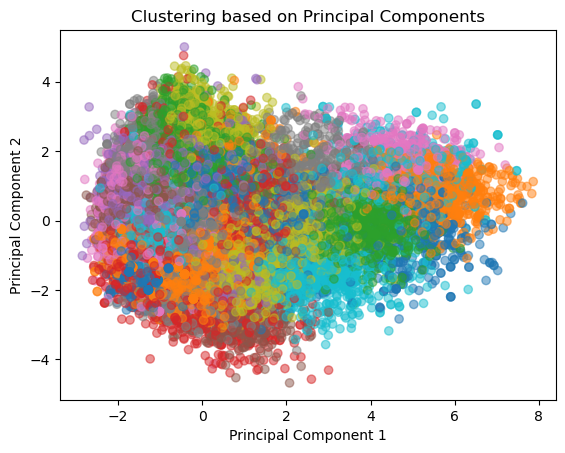

In [63]:
# Perform clustering using KMeans
num_clusters = 52  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=rng)
cluster_labels = kmeans.fit_predict(principal_components_final)

# Evaluate clustering performance (if ground truth labels are available)
if target_genre in df_subset.columns:
    true_labels = df_subset[target_genre].astype('category').cat.codes
    adjusted_rand_index = adjusted_rand_score(true_labels, cluster_labels)
    print(f'Adjusted Rand Index: {adjusted_rand_index}')

# Visualize clusters (2D plot for the first two principal components)
plt.scatter(principal_components_final[:, 0], principal_components_final[:, 1], c=cluster_labels, cmap='tab10',alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering based on Principal Components')
plt.show()


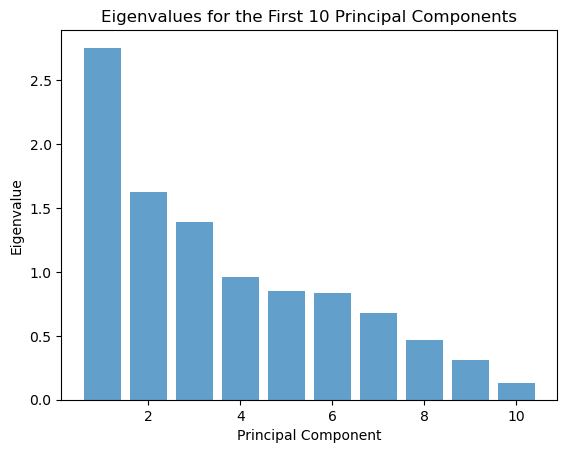

In [64]:

# Plot the eigenvalues for the first 10 components
num_components_to_plot = 10
eigenvalues = pca.explained_variance_[:num_components_to_plot]

plt.bar(range(1, num_components_to_plot + 1), eigenvalues, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues for the First 10 Principal Components')
plt.show()

In [65]:
features_standardized

array([[ 0.20770716,  0.6348741 , -0.83042378, ...,  0.77385857,
         1.03084434, -1.21883899],
       [-0.85305956, -0.81496727, -2.01239742, ..., -0.59328036,
        -0.72387481, -1.57545103],
       [-0.01265403, -0.7130253 , -1.23910619, ..., -0.50816666,
        -1.29964204, -1.6150176 ],
       ...,
       [ 0.00572052,  1.51270775,  0.59996467, ..., -0.65605172,
         1.43818986, -0.97586539],
       [-0.55998285,  0.92370969, -0.08517937, ...,  0.17806261,
         0.30232255,  1.2448209 ],
       [ 0.22183622,  0.68584509,  0.77625905, ..., -1.01033753,
         1.69278081,  0.15299573]])

/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

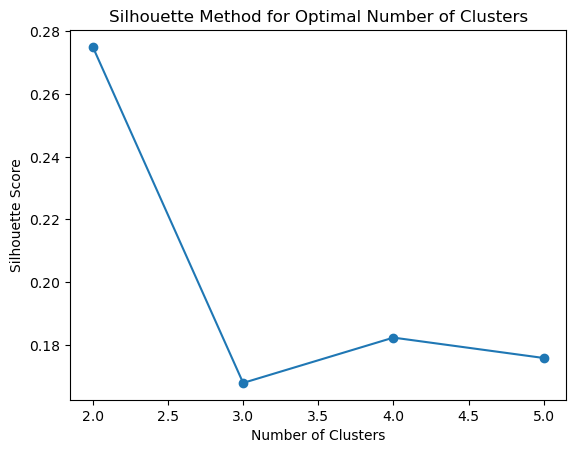

Optimal Number of Clusters: 2


/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


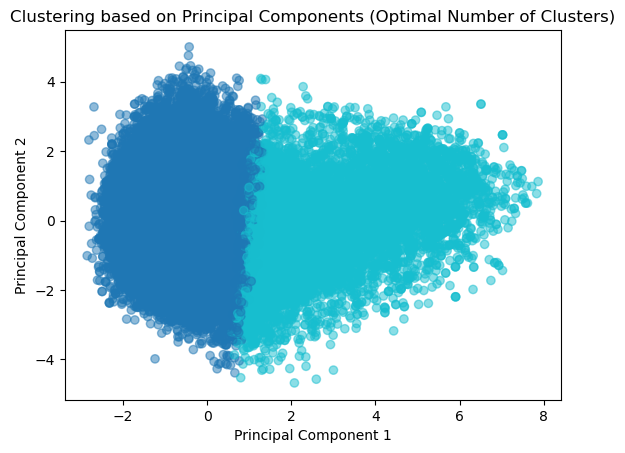

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


max_clusters = 5  # Set a reasonable upper limit for the number of clusters
silhouette_scores = []

for num_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=rng)
    cluster_labels = kmeans.fit_predict(principal_components_final)
    silhouette_avg = silhouette_score(principal_components_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()

# Determine the optimal number of clusters based on the silhouette score
optimal_num_clusters = np.argmax(silhouette_scores) + 2
print(f'Optimal Number of Clusters: {optimal_num_clusters}')

# Perform clustering using the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=rng)
cluster_labels_optimal = kmeans_optimal.fit_predict(principal_components)

# Visualize clusters (2D plot for the first two principal components)
plt.scatter(principal_components_final[:, 0], principal_components_final[:, 1], c=cluster_labels_optimal, cmap='tab10', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering based on Principal Components (Optimal Number of Clusters)')
plt.show()

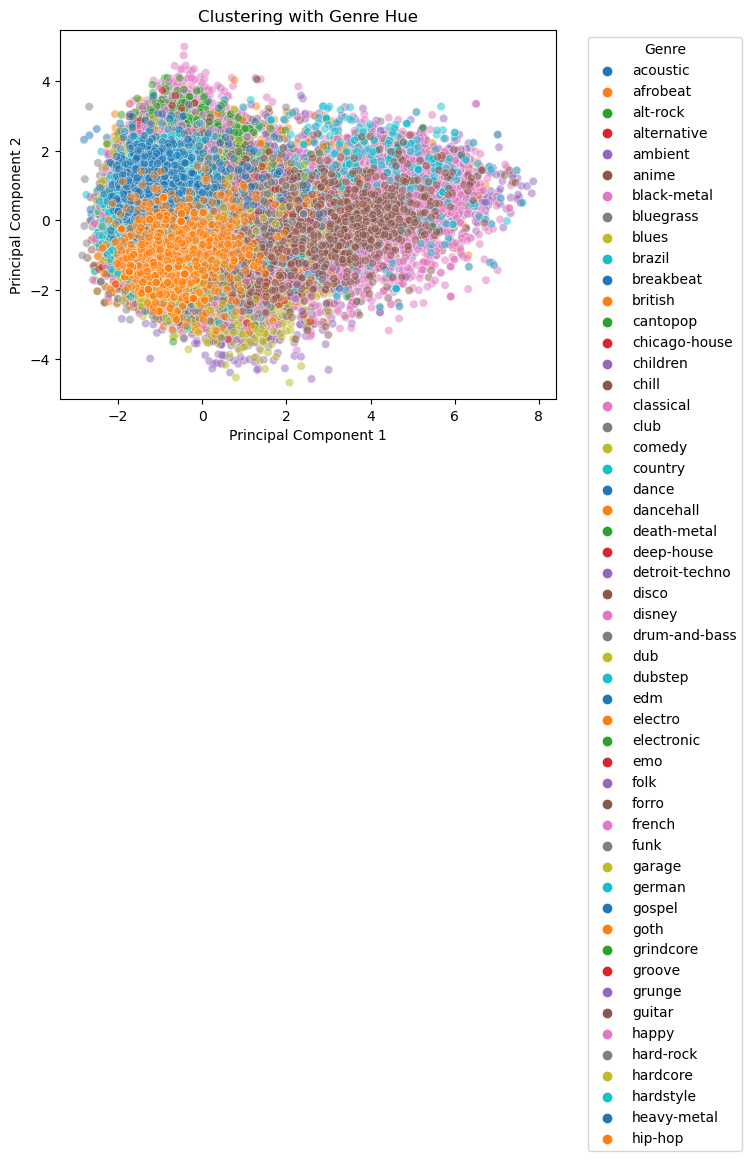

In [67]:
import seaborn as sns

# Assuming 'track_genre' is a categorical variable in your dataframe
sns.scatterplot(
    x=principal_components_final[:, 0],
    y=principal_components_final[:, 1],
    hue=df['track_genre'],
    palette='tab10',  # Adjust the palette as needed
    alpha=0.5
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering with Genre Hue')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [68]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming principal_components_final and df are already defined

# Specify the range of clusters
min_clusters = 50
max_clusters = 54

silhouette_scores = []

for num_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=rng)
    cluster_labels = kmeans.fit_predict(principal_components_final)
    silhouette_avg = silhouette_score(principal_components_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()


/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

# Q7

In [69]:
df_subset['mode'].value_counts()

KeyError: 'mode'

In [ ]:
!pip install imbalanced-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler  # Install imbalanced-learn library

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Select features and target variable
features = ['valence']
target = 'mode'  # Assuming the column name for the key mode

df_subset = df[features + [target]].dropna()

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=rng)
X_resampled, y_resampled = undersampler.fit_resample(df_subset[features], df_subset[target])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=rng)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg_model = LogisticRegression(random_state=rng)
logreg_model.fit(X_train_scaled, y_train)

# Predictions
logreg_predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_classification_report = classification_report(y_test, logreg_predictions)
logreg_confusion_matrix = confusion_matrix(y_test, logreg_predictions)

# Support Vector Machine
svm_model = SVC(kernel='linear', probability=True, random_state=rng)  # Set probability to True for computing AUC
svm_model.fit(X_train_scaled, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Print results
print("Logistic Regression Results:")
print(f"Accuracy: {logreg_accuracy}")
print("Classification Report:\n", logreg_classification_report)
print("Confusion Matrix:\n", logreg_confusion_matrix)

print("\nSupport Vector Machine Results:")
print(f"Accuracy: {svm_accuracy}")
print("Classification Report:\n", svm_classification_report)
print("Confusion Matrix:\n", svm_confusion_matrix)


In [ ]:
logreg_auc_score = roc_auc_score(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])
print(f"AUC Score: {logreg_auc_score}")

In [ ]:
svm_auc_score = roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
print(f"AUC Score: {svm_auc_score}")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_model.predict_proba(X_test_scaled)[:, 1])
logreg_roc_auc = auc(logreg_fpr, logreg_tpr)

# Plot ROC curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {logreg_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Select features and target variable
features = ['valence']
target = 'mode'  # Assuming the column name for the key mode

df_subset = df[features + [target]].dropna()

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=rng)
X_resampled, y_resampled = undersampler.fit_resample(df_subset[features], df_subset[target])

# Encode the target variable (mode: major=1, minor=0)
label_encoder = LabelEncoder()
df_subset[target] = label_encoder.fit_transform(df_subset[target])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=rng)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=rng)
rf_classifier.fit(X_train, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Print results
print("Random Forest Classifier Results:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:\n", rf_classification_report)
print("Confusion Matrix:\n", rf_confusion_matrix)


NameError: name 'RandomUnderSampler' is not defined

In [ ]:
rf_auc_score = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f"AUC Score: {rf_auc_score}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Q8

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics
from tensorflow.keras import backend as K

# def f1(y_true, y_pred):    
#     def recall_m(y_true, y_pred):
#         TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
#         recall = TP / (Positives+K.epsilon())    
#         return recall 
    
    
#     def precision_m(y_true, y_pred):
#         TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
#         precision = TP / (Pred_Positives+K.epsilon())
#         return precision 
    
#     precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))
def macro_f1(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives + K.epsilon())
        return recall

    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives + K.epsilon())
        return precision

    num_classes = K.int_shape(y_true)[-1]

    recalls = []
    precisions = []
    f1_scores = []

    for i in range(num_classes):
        y_true_class = y_true[:, i]
        y_pred_class = y_pred[:, i]

        precision = precision_m(y_true_class, y_pred_class)
        recall = recall_m(y_true_class, y_pred_class)

        precisions.append(precision)
        recalls.append(recall)

        f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
        f1_scores.append(f1)

    macro_f1 = K.mean(K.stack(f1_scores), axis=0)
    return macro_f1


df_subset = df.copy()
df_subset['duration_log'] = np.log1p(df_subset['duration'])
df_subset.drop(['duration'], axis=1, inplace=True)

features = ['duration_log', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'track_genre'

df_subset = df_subset[features + [target]].dropna()

# 2. Normalize loudness and tempo between 0 and 1
scaler_minmax = MinMaxScaler()
df_subset[['duration_log', 'loudness', 'tempo']] = scaler_minmax.fit_transform(df_subset[['duration_log', 'loudness', 'tempo']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_subset[features], df_subset[target], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA if using principal components
# pca = PCA(n_components=10)  # Use the number of principal components obtained in question 6
# X_train_scaled = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(df[target].unique()), activation='softmax'))  # Adjust based on the number of unique genres

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[macro_f1])

# Train the model
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
classification_rep = classification_report(y_test_encoded, y_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
from sklearn.metrics import f1_score

macro_averaged_f1 = metrics.f1_score(y_test_encoded, y_pred_classes, average = 'macro')
print(f'Macro Averaged F1 score with All Features: {macro_averaged_f1}')

Epoch 1/10
1040/1040 [==============================] - 1s 619us/step - loss: 2.9945 - macro_f1: 0.4652 - val_loss: 2.8015 - val_macro_f1: 0.3483
Epoch 2/10
1040/1040 [==============================] - 1s 568us/step - loss: 2.7437 - macro_f1: 0.4201 - val_loss: 2.7394 - val_macro_f1: 0.3229
Epoch 3/10
1040/1040 [==============================] - 1s 565us/step - loss: 2.6875 - macro_f1: 0.4145 - val_loss: 2.7033 - val_macro_f1: 0.3481
Epoch 4/10
1040/1040 [==============================] - 1s 558us/step - loss: 2.6479 - macro_f1: 0.4078 - val_loss: 2.6732 - val_macro_f1: 0.3552
Epoch 5/10
1040/1040 [==============================] - 1s 558us/step - loss: 2.6193 - macro_f1: 0.4041 - val_loss: 2.6624 - val_macro_f1: 0.4056
Epoch 6/10
1040/1040 [==============================] - 1s 556us/step - loss: 2.5940 - macro_f1: 0.4022 - val_loss: 2.6447 - val_macro_f1: 0.4034
Epoch 7/10
1040/1040 [==============================] - 1s 558us/step - loss: 2.5744 - macro_f1: 0.4040 - val_loss: 2.6331 -

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principal_components_final, df_subset[target], test_size=0.2, random_state=42)

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(principal_components_final.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(df[target].unique()), activation='softmax'))  # Adjust based on the number of unique genres

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[macro_f1])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
classification_rep = classification_report(y_test_encoded, y_pred_classes)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)
from sklearn.metrics import f1_score

macro_averaged_f1 = metrics.f1_score(y_test_encoded, y_pred_classes, average = 'macro')
print(f'Macro Averaged F1 score with Selected Features: {macro_averaged_f1}')

# Q9

In [72]:
ratings = pd.read_csv('starRatings.csv',header=None)
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
column_means = ratings.mean(axis=0)
row_means = ratings.mean(axis=1)

# Convert row_means to a NumPy array
row_means_array = row_means.to_numpy()

# Expand dimensions for broadcasting
row_means_array = row_means_array[:, np.newaxis]

# Use NumPy broadcasting to calculate the blended values
blended_values = 0.5 * (column_means.to_numpy() + row_means_array)

# Create a DataFrame from blended_values with proper columns and index
df_filled = pd.DataFrame(blended_values, columns=ratings.columns, index=ratings.index)

# Use the mask to update only missing values
df_filled = ratings.where(~missing_mask, df_filled)
df_filled

NameError: name 'missing_mask' is not defined

In [74]:
missing_values_per_column = ratings.isnull().sum(axis=0)
missing_values_per_column

0       9020
1       8989
2       8943
3       8974
4       8970
        ... 
4995    9019
4996    8985
4997    8986
4998    8981
4999    8951
Length: 5000, dtype: int64

In [75]:
songs = df.iloc[0:5000,:]
songs['average_star_rating'] = ratings.mean(axis=0)
songs['imputed_star_rating'] = df_filled.mean(axis=0)
songs['rating_count'] = ratings.count(axis=0)
songs

/var/folders/hr/ls1y97wn2334282q1yv5t58m0000gp/T/ipykernel_41290/2258229976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['average_star_rating'] = ratings.mean(axis=0)
/var/folders/hr/ls1y97wn2334282q1yv5t58m0000gp/T/ipykernel_41290/2258229976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['imputed_star_rating'] = df_filled.mean(axis=0)
/var/folders/hr/ls1y97wn2334282q1yv5t58m0000gp/T/ipykernel_41290/2258229976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,average_star_rating,imputed_star_rating,rating_count
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.6760,0.4610,1,...,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.196939,2.594999,980
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.4200,0.1660,1,...,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1.361029,1.677044,1011
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.4380,0.3590,0,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2.186377,2.089718,1057
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.2660,0.0596,0,...,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1.576998,1.785029,1026
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.6180,0.4430,2,...,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.038835,2.515947,1030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Ludovico Einaudi,Elements (Deluxe),Drop,49,300293,False,0.4650,0.0342,2,...,0.9920,0.939000,0.1030,0.0590,152.054,4,ambient,0.833843,1.413451,981
4996,4996,Air,Moon Safari,Kelly Watch the Stars,55,226293,False,0.5160,0.7430,2,...,0.2820,0.637000,0.1110,0.2260,109.837,4,ambient,2.368473,2.180766,1015
4997,4997,Ludovico Einaudi,Islands - Essential Einaudi,Passagio,50,357773,False,0.2220,0.0200,9,...,0.9950,0.948000,0.0945,0.1190,85.860,4,ambient,0.914201,1.453630,1014
4998,4998,Liquid Mind,Liquid Mind II: Slow World,Blue Seven,24,760053,False,0.0576,0.1690,10,...,0.9030,0.966000,0.1170,0.0310,50.838,4,ambient,0.890088,1.441574,1019


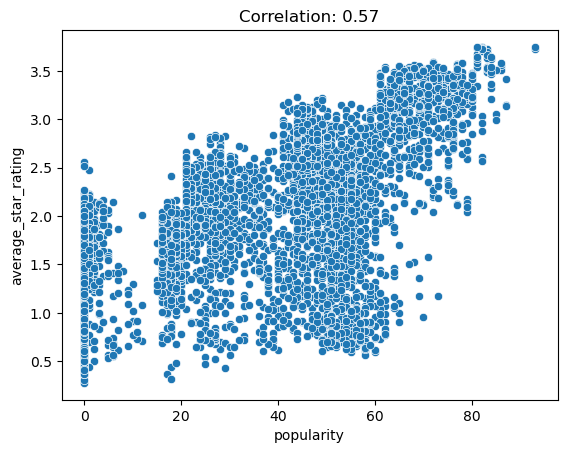

Correlation Coefficient: 0.5693914205195068


In [76]:
correlation_coefficient = songs['popularity'].corr(songs['average_star_rating'])

# Visualization (Optional)
sns.scatterplot(x='popularity', y='average_star_rating', data=songs)
plt.title(f"Correlation: {correlation_coefficient:.2f}")
plt.show()

# Interpretation
print(f"Correlation Coefficient: {correlation_coefficient}")

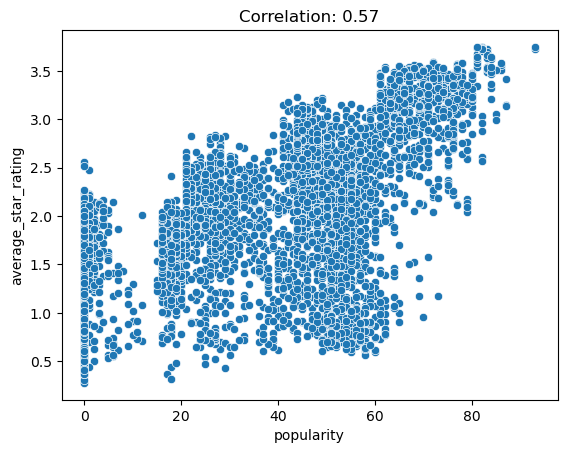

Correlation Coefficient: 0.5693914205195065


In [77]:
correlation_coefficient = songs['popularity'].corr(songs['imputed_star_rating'])

# Visualization (Optional)
sns.scatterplot(x='popularity', y='average_star_rating', data=songs)
plt.title(f"Correlation: {correlation_coefficient:.2f}")
plt.show()

# Interpretation
print(f"Correlation Coefficient: {correlation_coefficient}")

In [78]:
songs['rating_count'].sort_values(ascending=True).reset_index()

,index,rating_count
0,3274,889
1,3135,893
2,2976,899
3,2243,904
4,4121,906
...,...,...
4995,2254,1091
4996,2841,1092
4997,57,1099
4998,275,1100


In [79]:
from scipy.stats import spearmanr
correlation_coefficient, p_value = spearmanr(songs['popularity'], songs['average_star_rating'])
print("Correlation Coefficient: ", correlation_coefficient)
print("p-value: ",p_value)

Correlation Coefficient:  0.543458638456252
p-value:  0.0


In [80]:
correlation_coefficient, p_value = spearmanr(songs['popularity'], songs['imputed_star_rating'])
print("Correlation Coefficient: ", correlation_coefficient)
print("p-value: ",p_value)

Correlation Coefficient:  0.543458638456252
p-value:  0.0


In [81]:
from statsmodels.api import OLS, add_constant

model = OLS(songs['popularity'], add_constant(songs['average_star_rating'])).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2398.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:03:31   Log-Likelihood:                -22190.
No. Observations:                5000   AIC:                         4.438e+04
Df Residuals:                    4998   BIC:                         4.440e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.3845      0.852     -6.317      0.000      -7.056      -3.714
average_star_rating    19.6960      0.402     48.967      0.000      18.907      20.485
==============================================================================
Omnibus:                      282.606   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.814
Skew:                           0.185   Prob(JB):                     1.07e-28
Kurtosis:                       2.306   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
unique_songs = songs.drop_duplicates(subset=['artists', 'duration','average_star_rating'])
popular = unique_songs.nlargest(10, 'popularity')

# Display the top 10 hits
print("10 Popular songs (based on number of plays):")
popular[['track_name', 'popularity']]

10 Popular songs (based on number of plays):


,track_name,popularity
2003,Sweater Weather,93
3003,Sweater Weather,93
2000,Daddy Issues,87
3000,Daddy Issues,87
3300,Miss You,87
2002,Softcore,86
2106,Mr. Brightside,86
3002,Softcore,86
3004,abcdefu,86
3257,Mr. Brightside,86


In [83]:
unique_songs = songs.drop_duplicates(subset=['artists', 'duration','average_star_rating'])
greatest_hits = unique_songs.nlargest(10, 'average_star_rating')

# Display the top 10 hits
print("Top 10 Greatest Hits (based on average rating given):")
greatest_hits[['track_name', 'songNumber','average_star_rating']]

Top 10 Greatest Hits (based on average rating given):


,track_name,songNumber,average_star_rating
3877,"You're Gonna Go Far, Kid",3877,3.750000
3003,Sweater Weather,3003,3.748950
2260,Can't Stop,2260,3.744554
2562,"You're Gonna Go Far, Kid",2562,3.743202
3216,Californication,3216,3.741969
2105,Californication,2105,3.737475
2003,Sweater Weather,2003,3.729651
2011,Shut Up and Dance,2011,3.729124
3464,Can't Stop,3464,3.727829
3253,New Gold (feat. Tame Impala and Bootie Brown),3253,3.727451


# Q10

In [84]:
songs.columns # there are approximately 17 features 

Index(['songNumber', 'artists', 'album_name', 'track_name', 'popularity',
       'duration', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre',
       'average_star_rating', 'imputed_star_rating', 'rating_count'],
      dtype='object')

In [85]:
from sklearn.decomposition import TruncatedSVD

# Choose the number of latent factors (components)
n_latent_factors = 17
svd = TruncatedSVD(n_components=n_latent_factors)
latent_user_matrix = svd.fit_transform(df_filled)

In [86]:
predicted_ratings = np.dot(latent_user_matrix, svd.components_)
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=ratings.columns)
predicted_ratings_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,2.383914,1.465959,1.878633,1.573943,2.304862,1.943312,2.137277,2.208754,2.220738,2.076603,...,1.392955,1.119744,1.537757,1.456578,1.690277,1.202366,1.969681,1.242545,1.230488,1.182966
1,2.805938,1.887983,2.300657,1.995968,2.726886,2.365336,2.559302,2.630779,2.642763,2.498627,...,1.814979,1.541768,1.959781,1.878603,2.112301,1.624390,2.391705,1.664569,1.652513,1.604990
2,2.938762,2.020807,2.433481,2.128791,2.859710,2.498160,2.692125,2.763602,2.775586,2.631451,...,1.947803,1.674592,2.092605,2.011426,2.245125,1.757214,2.524529,1.797393,1.785336,1.737814
3,2.650652,1.732697,2.145370,1.840681,2.571600,2.210050,2.404015,2.475492,2.487476,2.343341,...,1.659692,1.386482,1.804495,1.723316,1.957015,1.469104,2.236419,1.509283,1.497226,1.449704
4,2.982831,2.064876,2.477550,2.172860,2.903779,2.542229,2.736194,2.807671,2.819655,2.675520,...,1.991872,1.718661,2.136674,2.055495,2.289194,1.801283,2.568598,1.841462,1.829405,1.781883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.060325,1.142370,1.555044,1.250355,1.981273,1.619723,1.813689,1.885165,1.897150,1.753014,...,1.069366,0.796155,1.214168,1.132990,1.366688,0.878777,1.646092,0.918956,0.906900,0.859377
9996,2.555551,1.637596,2.050270,1.745581,2.476499,2.114949,2.308915,2.380391,2.392376,2.248240,...,1.564592,1.291381,1.709394,1.628216,1.861914,1.374003,2.141318,1.414182,1.402126,1.354603
9997,2.971197,2.053242,2.465916,2.161226,2.892145,2.530595,2.724560,2.796037,2.808021,2.663886,...,1.980238,1.707027,2.125040,2.043861,2.277560,1.789649,2.556964,1.829828,1.817771,1.770249
9998,2.495295,1.577340,1.990014,1.685324,2.416243,2.054693,2.248658,2.320135,2.332120,2.187984,...,1.504336,1.231125,1.649138,1.567959,1.801658,1.313747,2.081062,1.353926,1.341870,1.294347


In [87]:
# Example: Recommend top 10 songs for each user based on collaborative filtering
top_song_recommendations = {}
for user_id in ratings.index:
    user_ratings = predicted_ratings_df.loc[user_id]
    unrated_songs = user_ratings[ratings.loc[user_id] == 0]
    top_recommendations = unrated_songs.sort_values(ascending=False).head(10).index.tolist()
    top_song_recommendations[user_id] = top_recommendations

recommendations_df = pd.DataFrame(list(top_song_recommendations.items()), columns=['user_id', 'recommendations'])
recommendations_df

,user_id,recommendations
0,0,"[2813, 488, 3995, 949, 3945, 345, 789, 1159, 1072, 2519]"
1,1,"[2937, 3442, 2032, 4104, 1419, 2281, 3897, 2494, 2290, 2024]"
2,2,"[621, 1406, 578, 626, 1999, 2068, 1564, 1274, 48, 4402]"
3,3,"[2678, 602, 718, 1666, 1546, 867, 3095, 2080, 1664, 579]"
4,4,"[310, 3039, 2164, 469, 1070, 2541, 3484, 3291, 267, 2274]"
...,...,...
9995,9995,"[2915, 2761, 2617, 2458, 498, 2918, 341, 333, 2946, 2551]"
9996,9996,"[2351, 2368, 4026, 1297, 329, 4052, 1481, 671, 3980, 3245]"
9997,9997,"[3594, 4719, 3489, 2738, 1575, 3165, 507, 3163, 428, 4433]"
9998,9998,"[3657, 2585, 1187, 473, 655, 1341, 682, 865, 3469, 3694]"


In [100]:
for target_number in greatest_hits['songNumber']:
    indices_with_number = [index for index, sublist in enumerate(recommendations_df['recommendations']) if target_number in sublist]

    # Print the result
    if indices_with_number:
        print(f"The number {target_number} is present in the list of lists at indices: {indices_with_number}.")
    else:
        print(f"The number {target_number} is not present in the list of lists.")


The number 3877 is present in the list of lists at indices: [5521, 7634].
The number 3003 is present in the list of lists at indices: [2749].
The number 2260 is present in the list of lists at indices: [5662, 9707].
The number 2562 is present in the list of lists at indices: [5617, 6628, 6695].
The number 3216 is present in the list of lists at indices: [2493, 7081].
The number 2105 is not present in the list of lists.
The number 2003 is present in the list of lists at indices: [79, 3816].
The number 2011 is present in the list of lists at indices: [6964].
The number 3464 is present in the list of lists at indices: [9793].
The number 3253 is present in the list of lists at indices: [5218, 5541].


In [91]:
user_rated_songs = {user_id: list(ratings.columns[ratings.loc[user_id].notna() & (ratings.loc[user_id] != 0)])
                    for user_id in ratings.index}

In [94]:
rated_songs_df = pd.DataFrame({
    'user_id': ratings.index,
    'rated_songs': ratings.apply(lambda row: list(row[row > 0].index), axis=1)
})
rated_songs_df

,user_id,rated_songs
0,0,"[24, 40, 52, 57, 59, 67, 78, 85, 97, 107, 111, 139, 153, 154, 162, 163, 171, 178, 189, 191, 192, 195, 199, 236, 268, 269, 285, 293, 316, 322, 323, 424, 431, 443, 455, 464, 485, 490, 512, 524, 548, 577, 586, 598, 603, 607, 611, 616, 620, 629, 650, 658, 659, 663, 664, 671, 678, 691, 705, 754, 755, 790, 805, 808, 829, 854, 855, 886, 889, 896, 902, 905, 909, 915, 917, 937, 943, 944, 951, 958, 965, 1045, 1047, 1049, 1050, 1052, 1070, 1097, 1103, 1111, 1135, 1146, 1154, 1178, 1203, 1208, 1211, 1218, 1222, 1231, ...]"
1,1,"[28, 34, 43, 127, 133, 144, 145, 172, 194, 203, 205, 227, 234, 275, 284, 302, 310, 316, 320, 353, 359, 368, 372, 373, 378, 379, 393, 413, 435, 446, 451, 462, 471, 472, 477, 491, 503, 549, 584, 594, 595, 596, 622, 652, 678, 679, 691, 695, 702, 706, 710, 713, 717, 737, 759, 763, 765, 771, 808, 844, 858, 886, 919, 925, 927, 931, 932, 935, 936, 943, 944, 950, 953, 954, 969, 980, 982, 993, 1000, 1027, 1030, 1037, 1041, 1044, 1047, 1054, 1058, 1064, 1086, 1123, 1124, 1125, 1163, 1168, 1178, 1183, 1196, 1197, 1239, 1240, ...]"
2,2,"[15, 18, 40, 50, 61, 77, 93, 100, 103, 106, 109, 118, 126, 127, 131, 140, 142, 155, 168, 169, 170, 186, 193, 194, 196, 204, 208, 210, 216, 227, 231, 235, 239, 255, 258, 263, 266, 267, 283, 289, 293, 318, 326, 332, 345, 346, 348, 349, 357, 359, 370, 391, 394, 411, 427, 439, 447, 465, 478, 485, 486, 502, 506, 551, 557, 561, 570, 600, 612, 630, 636, 640, 646, 670, 691, 692, 696, 699, 701, 709, 723, 731, 745, 775, 777, 786, 801, 815, 818, 824, 839, 850, 859, 881, 896, 913, 916, 936, 947, 955, ...]"
3,3,"[1, 18, 43, 74, 79, 81, 104, 131, 135, 148, 152, 163, 189, 190, 194, 217, 222, 263, 265, 271, 280, 282, 288, 300, 322, 333, 351, 356, 358, 366, 371, 383, 385, 412, 413, 416, 423, 424, 425, 436, 442, 458, 485, 498, 499, 524, 529, 530, 531, 534, 559, 575, 585, 620, 632, 648, 656, 679, 688, 700, 706, 728, 729, 730, 740, 742, 755, 757, 793, 799, 806, 835, 836, 838, 869, 909, 969, 972, 983, 995, 998, 1007, 1014, 1019, 1024, 1035, 1049, 1054, 1058, 1072, 1077, 1078, 1080, 1082, 1083, 1086, 1098, 1101, 1104, 1134, ...]"
4,4,"[11, 13, 34, 48, 51, 55, 75, 78, 117, 120, 135, 140, 141, 150, 166, 167, 170, 171, 173, 179, 184, 199, 207, 214, 244, 246, 249, 252, 259, 263, 304, 311, 331, 340, 368, 375, 396, 400, 401, 402, 415, 439, 447, 466, 486, 489, 490, 511, 523, 536, 539, 563, 577, 590, 607, 620, 623, 624, 667, 672, 680, 691, 697, 708, 718, 723, 728, 739, 771, 776, 780, 798, 807, 809, 814, 817, 826, 847, 858, 885, 892, 896, 897, 898, 900, 906, 913, 939, 946, 953, 960, 992, 1002, 1014, 1020, 1022, 1023, 1027, 1030, 1038, ...]"
...,...,...
9995,9995,"[46, 106, 152, 177, 200, 217, 243, 256, 257, 267, 288, 316, 404, 441, 472, 481, 495, 506, 509, 528, 551, 573, 578, 579, 593, 624, 659, 678, 693, 703, 789, 802, 817, 829, 841, 864, 874, 902, 961, 964, 1002, 1030, 1047, 1048, 1090, 1123, 1131, 1143, 1147, 1153, 1156, 1162, 1169, 1201, 1231, 1280, 1281, 1282, 1290, 1311, 1341, 1412, 1419, 1438, 1454, 1458, 1485, 1505, 1517, 1629, 1672, 1676, 1772, 1779, 1782, 1797, 1803, 1846, 1902, 1935, 1937, 1938, 1985, 2062, 2102, 2108, 2115, 2131, 2157, 2171, 2179, 2180, 2193, 2204, 2219, 2246, 2295, 2300, 2313, 2321, ...]"
9996,9996,"[30, 32, 61, 76, 95, 108, 125, 129, 149, 158, 162, 179, 188, 195, 199, 204, 207, 215, 220, 222, 237, 240, 244, 248, 254, 257, 258, 293, 294, 296, 302, 305, 325, 330, 340, 361, 384, 394, 395, 405, 409, 417, 420, 428, 434, 456, 457, 465, 478, 487, 510, 520, 546, 548, 551, 564, 585, 604, 628, 642, 646, 662, 665, 672, 674, 676, 679, 727, 728, 732, 734, 740, 743, 753, 759, 802, 804, 812, 830, 834, 840, 855, 880, 887, 889, 891, 899, 903, 909, 914, 927, 942, 946, 968, 972, 978, 979, 1013, 1014, 1027, ...]"
9997,9997,"[0, 10, 59, 63, 64, 83, 110, 120, 123, 129, 130, 131, 134, 137, 141, 150, 156, 157, 164, 171, 174, 175, 180, 202, 203, 207, 218, 221, 224, 228, 229, 243, 249, 280, 283, 313, 317, 321, 334, 345, 349, 351, 356, 358, 369, 381, 384, 395, 397, 406, 410, 418, 424, 431, 439, 

In [95]:
def average_precision(relevant_items, recommended_items, k=None):
    if k is None:
        k = len(recommended_items)
    else:
        recommended_items = recommended_items[:k]

    if not relevant_items:
        return 0.0

    score = 0.0
    num_hits = 0.0

    for i, item in enumerate(recommended_items):
        if item in relevant_items and item not in recommended_items[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    return score / min(len(relevant_items), k)


In [97]:
# Convert the test set DataFrame to a dictionary for faster lookup
test_set_dict = rated_songs_df.set_index('user_id')['rated_songs'].to_dict()

# Calculate AP for each user
aps = []
for index, row in recommendations_df.iterrows():
    user_id = row['user_id']
    user_recommendations = row['recommendations']
    user_relevant_items = test_set_dict.get(user_id, [])
    user_ap = average_precision(set(user_relevant_items), user_recommendations)
    aps.append(user_ap)

# Calculate the mean of the Average Precisions
mean_ap = sum(aps) / len(aps) if aps else 0

mean_ap


0.0

# Extra Credit

In [102]:
# Process the album names to determine if they are single-word or not
df['album_name_length'] = df['album_name'].apply(lambda x: 1 if len(x.split()) == 1 else 0)

# Extract the relevant columns into a new DataFrame
processed_df = df[['album_name', 'popularity', 'album_name_length']]

processed_df



,album_name,popularity,album_name_length
0,Comedy,73,1
1,Ghost (Acoustic),55,0
2,To Begin Again,57,0
3,Crazy Rich Asians (Original Motion Picture Soundtrack),71,0
4,Hold On,82,0
...,...,...,...
51995,Perreo Tenebroso Vol. 3,0,0
51996,Feliz Cumpleaños con Perreo,1,0
51997,Última Misión Reggaeton,0,0
51998,Energy Hip Hop,0,0


In [103]:
X = processed_df[['popularity']]
y = processed_df['album_name_length']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rng)


In [106]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [107]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[12477     0]
 [ 3123     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     12477
           1       0.00      0.00      0.00      3123

    accuracy                           0.80     15600
   macro avg       0.40      0.50      0.44     15600
weighted avg       0.64      0.80      0.71     15600



/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shuyan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
# Calculate probabilities for the test set.
y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for the positive outcome only


In [110]:
# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f'AUC: {auc}')


AUC: 0.6065935063712877


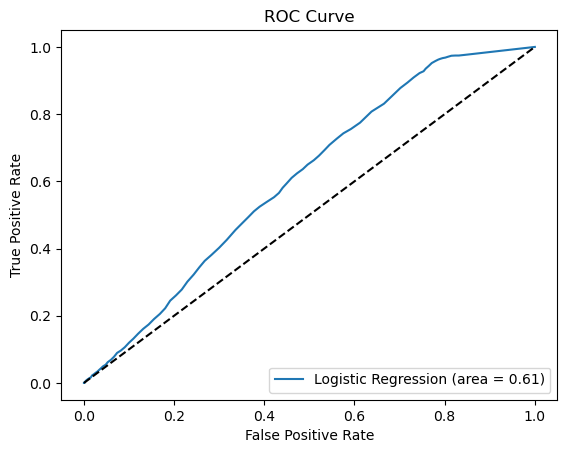

In [111]:
# Generate ROC curve values: fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
